In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np


First dataset for wildfires found here: https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436

In [87]:
fire_data = pd.read_csv('./data/California_Fire_Perimeters_5422071188818403882.csv')
display(fire_data)

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NAME,COMPLEX_INCNUM,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length
0,21440,2020.0,CA,CDF,NEU,NELSON,00013212,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,11.0,...,1.0,109.602300,NaN,NaN,NaN,NaN,NaN,2020.0,7.331347e+05,4179.743142
1,21441,2020.0,CA,CDF,NEU,AMORUSO,00011799,6/1/2020 12:00:00 AM,6/4/2020 12:00:00 AM,2.0,...,1.0,685.585000,NaN,NaN,NaN,NaN,NaN,2020.0,4.578172e+06,12399.375391
2,21442,2020.0,CA,CDF,NEU,ATHENS,00018493,8/10/2020 12:00:00 AM,8/11/2020 12:00:00 AM,14.0,...,1.0,27.300480,NaN,NaN,NaN,NaN,NaN,2020.0,1.823876e+05,2119.194120
3,21443,2020.0,CA,CDF,NEU,FLEMING,00007619,3/31/2020 12:00:00 AM,4/1/2020 12:00:00 AM,9.0,...,1.0,12.931550,NaN,NaN,NaN,NaN,NaN,2020.0,8.667945e+04,2029.524881
4,21444,2020.0,CA,CDF,NEU,MELANESE,00008471,4/14/2020 12:00:00 AM,4/19/2020 12:00:00 AM,18.0,...,1.0,10.315960,NaN,NaN,NaN,NaN,NaN,2020.0,7.017913e+04,1342.742903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21921,43907,2022.0,CA,LRA,VNC,CHAMBERS,00023419,3/16/2022 12:00:00 AM,3/17/2022 12:00:00 AM,14.0,...,1.0,1.547286,NaN,NaN,NaN,B541FD2D-0474-47CF-AF6C-C4576E03A590,NaN,2020.0,9.217691e+03,537.691347
21922,43908,2022.0,CA,LRA,VNC,MOON,00073287,8/14/2022 12:00:00 AM,8/14/2022 12:00:00 AM,14.0,...,1.0,1.424808,NaN,NaN,NaN,EE538AD9-C557-40F2-9EDD-56C345B4E7FD,NaN,2020.0,8.444238e+03,452.799309
21923,43909,2022.0,CA,USF,SHF,TEXAS,00000953,9/9/2022 12:00:00 AM,9/10/2022 12:00:00 AM,14.0,...,1.0,12.912490,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,NaN,NaN,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,NaN,2020.0,8.985026e+04,2061.550880
21924,43910,2022.0,CA,USF,KNF,ALEX,00006290,7/31/2022 12:00:00 AM,8/3/2022 12:00:00 AM,14.0,...,1.0,150.403500,E9A30E52-C8E6-4AA5-B7D8-967923865340,NaN,NaN,E9A30E52-C8E6-4AA5-B7D8-967923865340,NaN,2020.0,1.100802e+06,6500.414625


In [88]:
fire_location = gpd.read_file('./data/fire_shape_data/California_Fire_Perimeters_(all).shp')
fire_location

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,geometry
0,2020,CA,CDF,NEU,NELSON,00013212,2020-06-18,2020-06-23,11,1,1,109.60200,None,None,None,None,None,2020,"POLYGON ((-13508443.877 4705925.941, -13508437..."
1,2020,CA,CDF,NEU,AMORUSO,00011799,2020-06-01,2020-06-04,2,1,1,685.58500,None,None,None,None,None,2020,"POLYGON ((-13508927.937 4695976.336, -13508919..."
2,2020,CA,CDF,NEU,ATHENS,00018493,2020-08-10,2020-08-11,14,1,1,27.30050,None,None,None,None,None,2020,"POLYGON ((-13506766.482 4699576.903, -13506741..."
3,2020,CA,CDF,NEU,FLEMING,00007619,2020-03-31,2020-04-01,9,1,1,12.93150,None,None,None,None,None,2020,"POLYGON ((-13500068.676 4716384.732, -13500054..."
4,2020,CA,CDF,NEU,MELANESE,00008471,2020-04-14,2020-04-19,18,1,1,10.31600,None,None,None,None,None,2020,"POLYGON ((-13503128.528 4791692.607, -13503101..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21921,2022,CA,LRA,VNC,CHAMBERS,00023419,2022-03-16,2022-03-17,14,1,1,1.54729,None,None,None,B541FD2D-0474-47CF-AF6C-C4576E03A590,None,2020,"POLYGON ((-13237822.286 4081383.153, -13237822..."
21922,2022,CA,LRA,VNC,MOON,00073287,2022-08-14,2022-08-14,14,1,1,1.42481,None,None,None,EE538AD9-C557-40F2-9EDD-56C345B4E7FD,None,2020,"POLYGON ((-13241105.999 4051757.539, -13241098..."
21923,2022,CA,USF,SHF,TEXAS,00000953,2022-09-09,2022-09-10,14,6,1,12.91250,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,None,None,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,None,2020,"POLYGON ((-13703427.459 4905142.122, -13703465..."
21924,2022,CA,USF,KNF,ALEX,00006290,2022-07-31,2022-08-03,14,3,1,150.40400,E9A30E52-C8E6-4AA5-B7D8-967923865340,None,None,E9A30E52-C8E6-4AA5-B7D8-967923865340,None,2020,"MULTIPOLYGON (((-13687209.245 5152398.057, -13..."


In [89]:
print(len(fire_location["FIRE_NAME"]))
print(len(fire_location["FIRE_NAME"].unique()))
print(len(fire_data))

21926
9036
21926


In [90]:
print(str(fire_location["geometry"][0]))

POLYGON ((-13508443.8772 4705925.940700002, -13508437.8379 4705927.1696000025, -13508432.5098 4705928.6489999965, -13508425.6331 4705927.5942, -13508412.5327 4705926.491099998, -13508407.0184 4705920.868799999, -13508379.474 4705923.901799999, -13508375.554299999 4705922.965899996, -13508349.597199999 4705916.769000001, -13508335.955699999 4705915.666199997, -13508323.928399999 4705912.345700003, -13508305.407200001 4705915.054899998, -13508302.3279 4705912.968900003, -13508299.1929 4705912.081900001, -13508259.8919 4705911.782200001, -13508227.8504 4705918.351400003, -13508195.0158 4705910.391599998, -13508160.9214 4705912.369499996, -13508145.2926 4705907.298799999, -13508118.0374 4705889.964599997, -13508091.2863 4705881.944899999, -13508085.8466 4705876.598200001, -13508050.1008 4705861.865400001, -13508038.3534 4705862.860399999, -13508023.5361 4705857.417999998, -13507988.1356 4705842.217500001, -13507973.8504 4705829.174900003, -13507945.270399999 4705809.743100002, -13507911.93

In [91]:
merged_fire = pd.merge(fire_data, fire_location, left_index=True, right_index=True, suffixes=('', '_drop'))
merged_fire = merged_fire.filter(regex='^(?!.*_drop)')

print(merged_fire.columns)

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry'],
      dtype='object')


In [92]:
merged_fire

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,COMPLEX_NAME,COMPLEX_INCNUM,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length,COMPLEX_NA,COMPLEX_IN,geometry
0,21440,2020.0,CA,CDF,NEU,NELSON,00013212,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,11.0,...,NaN,NaN,NaN,NaN,2020.0,7.331347e+05,4179.743142,None,None,"POLYGON ((-13508443.877 4705925.941, -13508437..."
1,21441,2020.0,CA,CDF,NEU,AMORUSO,00011799,6/1/2020 12:00:00 AM,6/4/2020 12:00:00 AM,2.0,...,NaN,NaN,NaN,NaN,2020.0,4.578172e+06,12399.375391,None,None,"POLYGON ((-13508927.937 4695976.336, -13508919..."
2,21442,2020.0,CA,CDF,NEU,ATHENS,00018493,8/10/2020 12:00:00 AM,8/11/2020 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2020.0,1.823876e+05,2119.194120,None,None,"POLYGON ((-13506766.482 4699576.903, -13506741..."
3,21443,2020.0,CA,CDF,NEU,FLEMING,00007619,3/31/2020 12:00:00 AM,4/1/2020 12:00:00 AM,9.0,...,NaN,NaN,NaN,NaN,2020.0,8.667945e+04,2029.524881,None,None,"POLYGON ((-13500068.676 4716384.732, -13500054..."
4,21444,2020.0,CA,CDF,NEU,MELANESE,00008471,4/14/2020 12:00:00 AM,4/19/2020 12:00:00 AM,18.0,...,NaN,NaN,NaN,NaN,2020.0,7.017913e+04,1342.742903,None,None,"POLYGON ((-13503128.528 4791692.607, -13503101..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21921,43907,2022.0,CA,LRA,VNC,CHAMBERS,00023419,3/16/2022 12:00:00 AM,3/17/2022 12:00:00 AM,14.0,...,NaN,NaN,B541FD2D-0474-47CF-AF6C-C4576E03A590,NaN,2020.0,9.217691e+03,537.691347,None,None,"POLYGON ((-13237822.286 4081383.153, -13237822..."
21922,43908,2022.0,CA,LRA,VNC,MOON,00073287,8/14/2022 12:00:00 AM,8/14/2022 12:00:00 AM,14.0,...,NaN,NaN,EE538AD9-C557-40F2-9EDD-56C345B4E7FD,NaN,2020.0,8.444238e+03,452.799309,None,None,"POLYGON ((-13241105.999 4051757.539, -13241098..."
21923,43909,2022.0,CA,USF,SHF,TEXAS,00000953,9/9/2022 12:00:00 AM,9/10/2022 12:00:00 AM,14.0,...,NaN,NaN,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,NaN,2020.0,8.985026e+04,2061.550880,None,None,"POLYGON ((-13703427.459 4905142.122, -13703465..."
21924,43910,2022.0,CA,USF,KNF,ALEX,00006290,7/31/2022 12:00:00 AM,8/3/2022 12:00:00 AM,14.0,...,NaN,NaN,E9A30E52-C8E6-4AA5-B7D8-967923865340,NaN,2020.0,1.100802e+06,6500.414625,None,None,"MULTIPOLYGON (((-13687209.245 5152398.057, -13..."


In [93]:
merged_fire.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry'],
      dtype='object')

In [94]:
len(merged_fire["FIRE_NUM"].unique())

3173

Second dataset for wildfires is found here: https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020?select=California_Fire_Incidents.csv

In [95]:
#second_fire = pd.read_csv("./California_Fire_Incidents.csv")
#display(second_fire)

In [96]:
#second_fire.columns

In [97]:
#second_fire["Name"]

In [98]:
#merged_fire["ALARM_DATE"]

In [99]:
merged_fire["YEAR_"].unique()

array([2020., 2007., 2006., 2005., 2004., 1944., 1915., 1917., 1960.,
       1921., 1923., 1970., 1920., 1979., 1990., 1998., 1966., 1942.,
       1941., 1982., 1973., 1977., 1953., 1946., 1955., 1931., 1949.,
       1964., 1948., 1958., 1972., 1916., 1974., 1950., 1930., 1971.,
       1924., 1926., 1927., 1945., 1952., 1911., 1929.,   nan, 1997.,
       1984., 1910., 1951., 1956., 1981., 1909., 1935., 1936., 1961.,
       1919., 1925., 1928., 1918., 1940., 1933., 1968., 1999., 1943.,
       1914., 1922., 1975., 1932., 1912., 1978., 1983., 1913., 1947.,
       1934., 1937., 1938., 1967., 1976., 2000., 1994., 1878., 1895.,
       1896., 1898., 1907., 1908., 1986., 1980., 1954., 1962., 1959.,
       1900., 1957., 2003., 1969., 1988., 1996., 1991., 1992., 1995.,
       1987., 1939., 1903., 1905., 1906., 1985., 2001., 1989., 2002.,
       1965., 1993., 1963., 2008., 2010., 2016., 2012., 2014., 1902.,
       2009., 2011., 2013., 2015., 2017., 2018., 2019., 2021., 2022.])

In [100]:
#second_fire["ArchiveYear"].unique()

Might not be worth using because only 2 years match with the pm2.5 dataset.

The third dataset can be found here: https://www.kaggle.com/datasets/avkashchauhan/california-wildfire-dataset-from-2000-2021/data

In [101]:
third_fire = pd.read_csv("./data/ca_daily_fire_2000_2021-v2.csv")
display(third_fire)

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7
...,...,...,...,...,...,...,...,...,...,...,...
221178,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11
221179,41.9998,-120.7090,2012-08-13,Terra,MODIS,74.1,0,310.7,97,2012,8
221180,41.9998,-114.9167,2007-07-20,Aqua,MODIS,35.7,0,321.8,91,2007,7
221181,41.9999,-123.5675,2018-07-30,Terra,MODIS,18.2,0,295.8,62,2018,7


In [102]:
third_fire["year"].unique()

array([2011, 2013, 2010, 2009, 2004, 2002, 2018, 2007, 2005, 2008, 2014,
       2020, 2012, 2006, 2003, 2016, 2017, 2019, 2001, 2015, 2000])

In [103]:
third_fire.columns

Index(['latitude', 'longitude', 'acq_date', 'satellite', 'instrument', 'frp',
       'type', 'bright_t31', 'confidence', 'year', 'month'],
      dtype='object')

In [104]:
print(len(third_fire["acq_date"].unique()))
print(len(third_fire["acq_date"]))

6352
221183


In [105]:
merged_fire["ALARM_DATE"]

0        6/18/2020 12:00:00 AM
1         6/1/2020 12:00:00 AM
2        8/10/2020 12:00:00 AM
3        3/31/2020 12:00:00 AM
4        4/14/2020 12:00:00 AM
                 ...          
21921    3/16/2022 12:00:00 AM
21922    8/14/2022 12:00:00 AM
21923     9/9/2022 12:00:00 AM
21924    7/31/2022 12:00:00 AM
21925    7/25/2022 12:00:00 AM
Name: ALARM_DATE, Length: 21926, dtype: object

In [106]:
merged_fire["CONT_DATE"]

0        6/23/2020 12:00:00 AM
1         6/4/2020 12:00:00 AM
2        8/11/2020 12:00:00 AM
3         4/1/2020 12:00:00 AM
4        4/19/2020 12:00:00 AM
                 ...          
21921    3/17/2022 12:00:00 AM
21922    8/14/2022 12:00:00 AM
21923    9/10/2022 12:00:00 AM
21924     8/3/2022 12:00:00 AM
21925    7/25/2022 12:00:00 AM
Name: CONT_DATE, Length: 21926, dtype: object

In [107]:
merged_fire = merged_fire[(merged_fire["YEAR_"] >= 2011) & (merged_fire["YEAR_"] <= 2014)]
display(merged_fire)

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,COMPLEX_NAME,COMPLEX_INCNUM,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length,COMPLEX_NA,COMPLEX_IN,geometry
13045,34584,2012.0,CA,CCO,KRN,COWBOY,01217096,6/7/2012 12:00:00 AM,6/7/2012 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,4.771871e+03,368.968754,None,None,"POLYGON ((-13187023.232 4218136.070, -13187021..."
13046,34585,2012.0,CA,CCO,KRN,EDMONSTON,01218758,6/22/2012 12:00:00 AM,6/22/2012 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,7.914763e+04,3795.868045,None,None,"POLYGON ((-13236016.851 4157998.099, -13236016..."
13047,34586,2012.0,CA,CCO,KRN,EMIGDIO,01219717,6/29/2012 12:00:00 AM,6/29/2012 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,1.045049e+06,4798.880579,None,None,"POLYGON ((-13270806.002 4151445.849, -13270803..."
13048,34587,2012.0,CA,CCO,KRN,GRAPEVINE,01218491,6/18/2012 12:00:00 AM,6/18/2012 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,1.243085e+06,7063.686729,None,None,"POLYGON ((-13235680.988 4152022.282, -13235684..."
13049,34588,2012.0,CA,CCO,KRN,HILL,01218764,6/21/2012 12:00:00 AM,6/21/2012 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,8.903725e+04,1720.608691,None,None,"POLYGON ((-13298018.729 4180906.215, -13297990..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20437,42038,2014.0,CA,USF,KNF,RIVER,01706227,5/2/2014 12:00:00 AM,5/12/2014 12:00:00 AM,9.0,...,NaN,NaN,NaN,NaN,2010.0,1.165393e+05,1594.570065,None,None,"POLYGON ((-13695613.479 5128308.782, -13695622..."
20438,42039,2014.0,CA,USF,KNF,ETHEL,00005977,8/12/2014 12:00:00 AM,9/15/2014 12:00:00 AM,1.0,...,NaN,NaN,NaN,NaN,2010.0,8.375946e+04,1159.420758,None,None,"POLYGON ((-13716181.541 5078091.421, -13716033..."
21162,42778,2013.0,CA,CCO,VNC,SPRINGS,NaN,5/2/2013 12:00:00 AM,5/11/2013 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2010.0,1.401817e+08,166629.804623,None,None,"MULTIPOLYGON (((-13249430.922 4049132.907, -13..."
21566,43189,2014.0,CA,USF,SHF,COFFEE,00002410,7/29/2014 12:00:00 AM,10/30/2014 12:00:00 AM,1.0,...,COFFEE COMPLEX,NaN,NaN,NaN,2010.0,4.469850e+07,37130.571134,COFFEE COMPLEX,None,"POLYGON ((-13672617.853 5040221.726, -13672487..."


In [108]:
third_fire = third_fire[(third_fire["year"] >= 2011) & (third_fire["year"] <= 2014)]
display(third_fire)

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
5,32.5006,-114.7917,2013-02-06,Terra,MODIS,45.0,0,296.4,74,2013,2
13,32.5167,-114.7978,2011-11-05,Terra,MODIS,8.2,0,295.7,65,2011,11
...,...,...,...,...,...,...,...,...,...,...,...
221166,41.9994,-120.0259,2014-10-28,Terra,MODIS,57.3,0,285.6,62,2014,10
221171,41.9995,-120.6710,2012-08-14,Aqua,MODIS,227.1,0,309.3,100,2012,8
221176,41.9996,-120.6638,2012-08-14,Terra,MODIS,1717.1,0,364.8,100,2012,8
221178,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11


In [109]:
# Convert merged_fire to a GeoDataFrame
merged_fire_geo = gpd.GeoDataFrame(merged_fire, geometry='geometry')

merged_fire_geo.crs = {'init': 'epsg:3857'}
merged_fire_geo = merged_fire_geo.to_crs({'init': 'epsg:4326'})
merged_fire_geo['latitude'] = merged_fire_geo.centroid.y
merged_fire_geo['longitude'] = merged_fire_geo.centroid.x

# Convert third_fire to a GeoDataFrame
third_fire_geo = gpd.GeoDataFrame(third_fire, geometry=gpd.points_from_xy(third_fire['longitude'], third_fire['latitude']))

# Set the coordinate reference system (CRS) for both GeoDataFrames
merged_fire_geo.crs = {'init': 'epsg:4326'}
third_fire_geo.crs = {'init': 'epsg:4326'}

/Users/otaira/.pyenv/versions/3.12.2/envs/emberalert/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/bb/bc8ww5jx0kgdhn7fznlq1nqc0000gn/T/ipykernel_87092/1143485156.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_fire_geo['latitude'] = merged_fire_geo.centroid.y
/var/folders/bb/bc8ww5jx0kgdhn7fznlq1nqc0000gn/T/ipykernel_87092/1143485156.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS be

In [110]:
merged_fire_geo

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length,COMPLEX_NA,COMPLEX_IN,geometry,latitude,longitude
13045,34584,2012.0,CA,CCO,KRN,COWBOY,01217096,6/7/2012 12:00:00 AM,6/7/2012 12:00:00 AM,14.0,...,NaN,NaN,2010.0,4.771871e+03,368.968754,None,None,"POLYGON ((-118.46105 35.39826, -118.46103 35.3...",35.398075,-118.460940
13046,34585,2012.0,CA,CCO,KRN,EDMONSTON,01218758,6/22/2012 12:00:00 AM,6/22/2012 12:00:00 AM,14.0,...,NaN,NaN,2010.0,7.914763e+04,3795.868045,None,None,"POLYGON ((-118.90116 34.95670, -118.90116 34.9...",34.953109,-118.898142
13047,34586,2012.0,CA,CCO,KRN,EMIGDIO,01219717,6/29/2012 12:00:00 AM,6/29/2012 12:00:00 AM,14.0,...,NaN,NaN,2010.0,1.045049e+06,4798.880579,None,None,"POLYGON ((-119.21368 34.90844, -119.21365 34.9...",34.906434,-119.209424
13048,34587,2012.0,CA,CCO,KRN,GRAPEVINE,01218491,6/18/2012 12:00:00 AM,6/18/2012 12:00:00 AM,14.0,...,NaN,NaN,2010.0,1.243085e+06,7063.686729,None,None,"POLYGON ((-118.89815 34.91269, -118.89817 34.9...",34.908048,-118.893613
13049,34588,2012.0,CA,CCO,KRN,HILL,01218764,6/21/2012 12:00:00 AM,6/21/2012 12:00:00 AM,14.0,...,NaN,NaN,2010.0,8.903725e+04,1720.608691,None,None,"POLYGON ((-119.45813 35.12518, -119.45788 35.1...",35.123764,-119.459344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20437,42038,2014.0,CA,USF,KNF,RIVER,01706227,5/2/2014 12:00:00 AM,5/12/2014 12:00:00 AM,9.0,...,NaN,NaN,2010.0,1.165393e+05,1594.570065,None,None,"POLYGON ((-123.02979 41.78152, -123.02987 41.7...",41.780934,-123.027870
20438,42039,2014.0,CA,USF,KNF,ETHEL,00005977,8/12/2014 12:00:00 AM,9/15/2014 12:00:00 AM,1.0,...,NaN,NaN,2010.0,8.375946e+04,1159.420758,None,None,"POLYGON ((-123.21456 41.44425, -123.21322 41.4...",41.444664,-123.212820
21162,42778,2013.0,CA,CCO,VNC,SPRINGS,NaN,5/2/2013 12:00:00 AM,5/11/2013 12:00:00 AM,14.0,...,NaN,NaN,2010.0,1.401817e+08,166629.804623,None,None,"MULTIPOLYGON (((-119.02166 34.15128, -119.0219...",34.128425,-119.009099
21566,43189,2014.0,CA,USF,SHF,COFFEE,00002410,7/29/2014 12:00:00 AM,10/30/2014 12:00:00 AM,1.0,...,NaN,NaN,2010.0,4.469850e+07,37130.571134,COFFEE COMPLEX,None,"POLYGON ((-122.82322 41.18875, -122.82205 41.1...",41.153162,-122.823041


In [111]:
third_fire_geo

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month,geometry
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6,POINT (-114.69060 32.46460)
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10,POINT (-114.67850 32.47680)
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2,POINT (-114.78560 32.49370)
5,32.5006,-114.7917,2013-02-06,Terra,MODIS,45.0,0,296.4,74,2013,2,POINT (-114.79170 32.50060)
13,32.5167,-114.7978,2011-11-05,Terra,MODIS,8.2,0,295.7,65,2011,11,POINT (-114.79780 32.51670)
...,...,...,...,...,...,...,...,...,...,...,...,...
221166,41.9994,-120.0259,2014-10-28,Terra,MODIS,57.3,0,285.6,62,2014,10,POINT (-120.02590 41.99940)
221171,41.9995,-120.6710,2012-08-14,Aqua,MODIS,227.1,0,309.3,100,2012,8,POINT (-120.67100 41.99950)
221176,41.9996,-120.6638,2012-08-14,Terra,MODIS,1717.1,0,364.8,100,2012,8,POINT (-120.66380 41.99960)
221178,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11,POINT (-121.02370 41.99980)


In [112]:
merged_fire_geo

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length,COMPLEX_NA,COMPLEX_IN,geometry,latitude,longitude
13045,34584,2012.0,CA,CCO,KRN,COWBOY,01217096,6/7/2012 12:00:00 AM,6/7/2012 12:00:00 AM,14.0,...,NaN,NaN,2010.0,4.771871e+03,368.968754,None,None,"POLYGON ((-118.46105 35.39826, -118.46103 35.3...",35.398075,-118.460940
13046,34585,2012.0,CA,CCO,KRN,EDMONSTON,01218758,6/22/2012 12:00:00 AM,6/22/2012 12:00:00 AM,14.0,...,NaN,NaN,2010.0,7.914763e+04,3795.868045,None,None,"POLYGON ((-118.90116 34.95670, -118.90116 34.9...",34.953109,-118.898142
13047,34586,2012.0,CA,CCO,KRN,EMIGDIO,01219717,6/29/2012 12:00:00 AM,6/29/2012 12:00:00 AM,14.0,...,NaN,NaN,2010.0,1.045049e+06,4798.880579,None,None,"POLYGON ((-119.21368 34.90844, -119.21365 34.9...",34.906434,-119.209424
13048,34587,2012.0,CA,CCO,KRN,GRAPEVINE,01218491,6/18/2012 12:00:00 AM,6/18/2012 12:00:00 AM,14.0,...,NaN,NaN,2010.0,1.243085e+06,7063.686729,None,None,"POLYGON ((-118.89815 34.91269, -118.89817 34.9...",34.908048,-118.893613
13049,34588,2012.0,CA,CCO,KRN,HILL,01218764,6/21/2012 12:00:00 AM,6/21/2012 12:00:00 AM,14.0,...,NaN,NaN,2010.0,8.903725e+04,1720.608691,None,None,"POLYGON ((-119.45813 35.12518, -119.45788 35.1...",35.123764,-119.459344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20437,42038,2014.0,CA,USF,KNF,RIVER,01706227,5/2/2014 12:00:00 AM,5/12/2014 12:00:00 AM,9.0,...,NaN,NaN,2010.0,1.165393e+05,1594.570065,None,None,"POLYGON ((-123.02979 41.78152, -123.02987 41.7...",41.780934,-123.027870
20438,42039,2014.0,CA,USF,KNF,ETHEL,00005977,8/12/2014 12:00:00 AM,9/15/2014 12:00:00 AM,1.0,...,NaN,NaN,2010.0,8.375946e+04,1159.420758,None,None,"POLYGON ((-123.21456 41.44425, -123.21322 41.4...",41.444664,-123.212820
21162,42778,2013.0,CA,CCO,VNC,SPRINGS,NaN,5/2/2013 12:00:00 AM,5/11/2013 12:00:00 AM,14.0,...,NaN,NaN,2010.0,1.401817e+08,166629.804623,None,None,"MULTIPOLYGON (((-119.02166 34.15128, -119.0219...",34.128425,-119.009099
21566,43189,2014.0,CA,USF,SHF,COFFEE,00002410,7/29/2014 12:00:00 AM,10/30/2014 12:00:00 AM,1.0,...,NaN,NaN,2010.0,4.469850e+07,37130.571134,COFFEE COMPLEX,None,"POLYGON ((-122.82322 41.18875, -122.82205 41.1...",41.153162,-122.823041


In [113]:
# Convert 'ALARM_DATE', 'CONT_DATE', and 'acq_date' to datetime if not already
merged_fire_geo['ALARM_DATE'] = pd.to_datetime(merged_fire_geo['ALARM_DATE'], errors='coerce')
merged_fire_geo['CONT_DATE'] = pd.to_datetime(merged_fire_geo['CONT_DATE'], errors='coerce')
third_fire_geo['acq_date'] = pd.to_datetime(third_fire_geo['acq_date'])

# Perform the spatial join with a distance tolerance
distance_tolerance = 10  # Adjust the distance tolerance as needed (in degrees)
merged_df = gpd.sjoin_nearest(merged_fire_geo, third_fire_geo, how='inner', distance_col='distance')
merged_df.shape

/var/folders/bb/bc8ww5jx0kgdhn7fznlq1nqc0000gn/T/ipykernel_87092/3089365612.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_fire_geo['ALARM_DATE'] = pd.to_datetime(merged_fire_geo['ALARM_DATE'], errors='coerce')
/var/folders/bb/bc8ww5jx0kgdhn7fznlq1nqc0000gn/T/ipykernel_87092/3089365612.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_fire_geo['CONT_DATE'] = pd.to_datetime(merged_fire_geo['CONT_DATE'], errors='coerce')
/Users/otaira/.pyenv/versions/3.12.2/envs/emberalert/lib/python3.12/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS befo

(16695, 39)

In [114]:
len(merged_df)

16695

In [115]:
timed_df = merged_df[
                      (merged_df['acq_date'] >= merged_df['ALARM_DATE']) &
                      (merged_df['acq_date'] <= merged_df['CONT_DATE'])]
# Print the merged DataFrame
timed_df.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry', 'latitude_left', 'longitude_left',
       'index_right', 'latitude_right', 'longitude_right', 'acq_date',
       'satellite', 'instrument', 'frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance'],
      dtype='object')

In [116]:
timed_df['day'] = timed_df['acq_date'].dt.day
timed_df

/Users/otaira/.pyenv/versions/3.12.2/envs/emberalert/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,satellite,instrument,frp,type,bright_t31,confidence,year,month,distance,day
13056,34595,2012.0,CA,CCO,KRN,LAVAL,01216604,2012-06-03,2012-06-03,14.0,...,Terra,MODIS,23.1,0,320.8,76,2012,6,0.000216,3
13063,34602,2012.0,CA,CCO,KRN,SAND,01222306,2012-07-17,2012-07-17,14.0,...,Aqua,MODIS,226.5,0,322.3,100,2012,7,0.000000,17
13065,34604,2012.0,CA,CCO,KRN,SOUTH,01223744,2012-07-29,2012-08-01,14.0,...,Aqua,MODIS,292.7,0,322.5,100,2012,7,0.000000,29
17235,38813,2011.0,CA,CDF,AEU,GROOVY,00027965,2011-12-01,2011-12-01,5.0,...,Terra,MODIS,11.2,0,278.8,53,2011,12,0.002170,1
17239,38817,2011.0,CA,USF,ANF,MINT,00004967,2011-09-17,2011-09-19,9.0,...,Aqua,MODIS,249.0,0,313.9,100,2011,9,0.000000,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,Aqua,MODIS,40.6,0,306.8,88,2012,8,0.000000,12
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,Aqua,MODIS,6.5,0,291.0,56,2012,8,0.000000,14
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,Terra,MODIS,16.5,0,294.5,97,2012,8,0.000000,12
21567,43190,2012.0,CA,USF,KNF,HELLO,00005659,2012-08-05,2012-10-01,1.0,...,Aqua,MODIS,23.1,0,294.7,100,2012,8,0.000000,12


In [117]:
pm = pd.read_csv("./data/Daily_Census_Tract-Level_PM2.5_Concentrations__2011-2014_20240413.csv")
pm_cali = pm[pm["statefips"]== 6]
pm_cali['date_parsed'] = pd.to_datetime(pm_cali['date'], format='%d%b%Y')
pm_cali['month'] = pm_cali['date_parsed'].dt.month
pm_cali.head()

/var/folders/bb/bc8ww5jx0kgdhn7fznlq1nqc0000gn/T/ipykernel_87092/3587920976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_cali['date_parsed'] = pd.to_datetime(pm_cali['date'], format='%d%b%Y')
/var/folders/bb/bc8ww5jx0kgdhn7fznlq1nqc0000gn/T/ipykernel_87092/3587920976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_cali['month'] = pm_cali['date_parsed'].dt.month


,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd,date_parsed,month
10645,2011,31DEC2011,6,6001,6001400100,37.86754,-122.23181,8.143539,4.009139,2011-12-31,12
10646,2011,31DEC2011,6,6001,6001400200,37.84817,-122.24948,8.116514,3.971881,2011-12-31,12
10647,2011,31DEC2011,6,6001,6001400300,37.84056,-122.25442,8.083649,3.933703,2011-12-31,12
10648,2011,31DEC2011,6,6001,6001400400,37.84801,-122.25752,8.180107,4.215300,2011-12-31,12
10649,2011,31DEC2011,6,6001,6001400500,37.84853,-122.26480,8.125882,4.103174,2011-12-31,12


In [118]:
pm_cali['day'] = pm_cali['date_parsed'].dt.day
pm_cali.head()

/var/folders/bb/bc8ww5jx0kgdhn7fznlq1nqc0000gn/T/ipykernel_87092/801338806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_cali['day'] = pm_cali['date_parsed'].dt.day


,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd,date_parsed,month,day
10645,2011,31DEC2011,6,6001,6001400100,37.86754,-122.23181,8.143539,4.009139,2011-12-31,12,31
10646,2011,31DEC2011,6,6001,6001400200,37.84817,-122.24948,8.116514,3.971881,2011-12-31,12,31
10647,2011,31DEC2011,6,6001,6001400300,37.84056,-122.25442,8.083649,3.933703,2011-12-31,12,31
10648,2011,31DEC2011,6,6001,6001400400,37.84801,-122.25752,8.180107,4.215300,2011-12-31,12,31
10649,2011,31DEC2011,6,6001,6001400500,37.84853,-122.26480,8.125882,4.103174,2011-12-31,12,31


In [119]:
pm_cali.columns

Index(['year', 'date', 'statefips', 'countyfips', 'ctfips', 'latitude',
       'longitude', 'ds_pm_pred', 'ds_pm_stdd', 'date_parsed', 'month', 'day'],
      dtype='object')

In [120]:
pm25_geo = gpd.GeoDataFrame(pm_cali, geometry=gpd.points_from_xy(pm_cali['longitude'], pm_cali['latitude']))

pm25_geo.crs = {'init': 'epsg:4326'}
pm25_geo = pm25_geo.rename(columns={'index_left': 'index_left_pm25', 'index_right': 'index_right_pm25'})

timed_df = timed_df.rename(columns={'index_left': 'index_left_fire', 'index_right': 'index_right_fire'})

/Users/otaira/.pyenv/versions/3.12.2/envs/emberalert/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [121]:
timed_df.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry', 'latitude_left', 'longitude_left',
       'index_right_fire', 'latitude_right', 'longitude_right', 'acq_date',
       'satellite', 'instrument', 'frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance', 'day'],
      dtype='object')

In [122]:
timed_df.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry', 'latitude_left', 'longitude_left',
       'index_right_fire', 'latitude_right', 'longitude_right', 'acq_date',
       'satellite', 'instrument', 'frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance', 'day'],
      dtype='object')

In [123]:
timed_df = timed_df.reset_index(drop=True, inplace=False)
timed_df_2011 = timed_df[timed_df['year']==2011]

pm25_geo_2011 = pm25_geo[pm25_geo['year']==2011]
pm25_geo_2011.shape, timed_df_2011.shape

((2934600, 13), (614, 40))

In [124]:
pm_cali_avg = pm_cali.groupby(['day','year', 'month', 'countyfips'])['ds_pm_pred'].mean()
pm_cali_avg = pm_cali_avg.reset_index()
print(pm_cali_avg.head())

   day  year  month  countyfips  ds_pm_pred
0    1  2011      1        6001    9.233141
1    1  2011      1        6003    3.740929
2    1  2011      1        6005    4.788112
3    1  2011      1        6007    4.765327
4    1  2011      1        6009    4.594047


In [125]:
timed_df_filtered = timed_df[['FIRE_NAME', 'GIS_ACRES', 'Shape__Area', 'Shape__Length', 'acq_date', 'latitude_right', 'longitude_right','frp', 'type', 'bright_t31', 'confidence',
       'year', 'month', 'distance']]
timed_df_filtered['day'] = timed_df_filtered['acq_date'].dt.day
timed_df_filtered


/var/folders/bb/bc8ww5jx0kgdhn7fznlq1nqc0000gn/T/ipykernel_87092/3473818295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timed_df_filtered['day'] = timed_df_filtered['acq_date'].dt.day


,FIRE_NAME,GIS_ACRES,Shape__Area,Shape__Length,acq_date,latitude_right,longitude_right,frp,type,bright_t31,confidence,year,month,distance,day
0,LAVAL,41.16521,2.487328e+05,2515.675850,2012-06-03,34.9829,-118.9148,23.1,0,320.8,76,2012,6,0.000216,3
1,SAND,1428.45400,8.660542e+06,21616.461724,2012-07-17,35.1097,-118.3168,226.5,0,322.3,100,2012,7,0.000000,17
2,SOUTH,245.71260,1.505821e+06,7866.980151,2012-07-29,35.5599,-118.4634,292.7,0,322.5,100,2012,7,0.000000,29
3,GROOVY,46.53661,3.101320e+05,3119.986471,2011-12-01,38.7503,-120.4645,11.2,0,278.8,53,2011,12,0.002170,1
4,MINT,601.99160,3.600745e+06,8952.761601,2011-09-17,34.5579,-118.3275,249.0,0,313.9,100,2011,9,0.000000,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-12,41.9625,-123.2319,40.6,0,306.8,88,2012,8,0.000000,12
15308,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-14,41.9628,-123.2163,6.5,0,291.0,56,2012,8,0.000000,14
15309,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-12,41.9631,-123.2303,16.5,0,294.5,97,2012,8,0.000000,12
15310,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-12,41.9632,-123.2345,23.1,0,294.7,100,2012,8,0.000000,12


Data for counties found here: https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-county-boundaries/about

In [126]:
counties = gpd.read_file("./data/California_County_Boundaries_8408091426384550881/cnty19_1.shp")
counties.head()

,COUNTY_NAM,COUNTY_ABB,COUNTY_NUM,COUNTY_COD,COUNTY_FIP,ISLAND,GlobalID,geometry
0,Alameda,ALA,1,01,001,None,e6f92268-d2dd-4cfb-8b79-5b4b2f07c559,"POLYGON ((-13611173.233 4566017.932, -13611101..."
1,Alpine,ALP,2,02,003,None,870479b2-480a-494b-8352-ad60578839c1,"POLYGON ((-13312326.921 4680816.110, -13314594..."
2,Amador,AMA,3,03,005,None,4f45b3a6-be10-461c-8945-6b2aaa7119f6,"POLYGON ((-13366405.546 4679183.529, -13366428..."
3,Butte,BUT,4,04,007,None,44fba680-aecc-4e04-a499-29d69affbd4a,"POLYGON ((-13478186.664 4807593.081, -13478185..."
4,Calaveras,CAL,5,05,009,None,d11ef739-4a1e-414e-bfd1-e7dcd56cd61e,"POLYGON ((-13360333.217 4641182.754, -13361541..."


In [127]:
from shapely.geometry import Point

counties = counties.to_crs("EPSG:4326")

gdf = gpd.GeoDataFrame(
    timed_df_filtered, 
    geometry=[Point(xy) for xy in zip(timed_df_filtered.longitude_right, timed_df_filtered.latitude_right)],
    crs="EPSG:4326"  # Make sure to use the right Coordinate Reference System
)

if 'index_left' in gdf.columns or 'index_right' in gdf.columns:
    gdf.rename(columns={'index_left': 'index_left_old', 'index_right': 'index_right_old'}, inplace=True)
    
gdf = gpd.sjoin(gdf, counties, how="left", predicate='intersects')



In [128]:
gdf['COUNTY_FIP'] = pd.to_numeric(gdf['COUNTY_FIP'], errors='coerce')
gdf.columns

Index(['FIRE_NAME', 'GIS_ACRES', 'Shape__Area', 'Shape__Length', 'acq_date',
       'latitude_right', 'longitude_right', 'frp', 'type', 'bright_t31',
       'confidence', 'year', 'month', 'distance', 'day', 'geometry',
       'index_right', 'COUNTY_NAM', 'COUNTY_ABB', 'COUNTY_NUM', 'COUNTY_COD',
       'COUNTY_FIP', 'ISLAND', 'GlobalID'],
      dtype='object')

In [129]:
pm_cali_avg['standard_fips'] = pm_cali_avg["countyfips"]-6000
pm_cali_avg

,day,year,month,countyfips,ds_pm_pred,standard_fips
0,1,2011,1,6001,9.233141,1
1,1,2011,1,6003,3.740929,3
2,1,2011,1,6005,4.788112,5
3,1,2011,1,6007,4.765327,7
4,1,2011,1,6009,4.594047,9
...,...,...,...,...,...,...
84733,31,2014,12,6107,30.766791,107
84734,31,2014,12,6109,8.678418,109
84735,31,2014,12,6111,8.573657,111
84736,31,2014,12,6113,4.674280,113


In [130]:
np.unique(pm_cali_avg["standard_fips"])

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115])

In [131]:
np.unique(gdf["COUNTY_FIP"])

array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  17.,  19.,  21.,  23.,
        25.,  27.,  29.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,
        49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,  69.,  71.,
        73.,  79.,  83.,  89.,  91.,  93.,  95.,  97.,  99., 103., 105.,
       107., 109., 111., 113., 115.,  nan])

In [132]:
timed_avg = gdf.groupby(['day','year', 'month', 'COUNTY_FIP'])[["GIS_ACRES",'Shape__Area', 'Shape__Length', 'frp', 'bright_t31']].mean()
timed_avg = gdf.reset_index()
timed_avg.rename(columns={'COUNTY_FIP': 'countyfip'}, inplace=True)
pm_cali_avg.rename(columns={'standard_fips': 'countyfip'}, inplace=True)
timed_avg


,index,FIRE_NAME,GIS_ACRES,Shape__Area,Shape__Length,acq_date,latitude_right,longitude_right,frp,type,...,day,geometry,index_right,COUNTY_NAM,COUNTY_ABB,COUNTY_NUM,COUNTY_COD,countyfip,ISLAND,GlobalID
0,0,LAVAL,41.16521,2.487328e+05,2515.675850,2012-06-03,34.9829,-118.9148,23.1,0,...,3,POINT (-118.91480 34.98290),14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5
1,1,SAND,1428.45400,8.660542e+06,21616.461724,2012-07-17,35.1097,-118.3168,226.5,0,...,17,POINT (-118.31680 35.10970),14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5
2,2,SOUTH,245.71260,1.505821e+06,7866.980151,2012-07-29,35.5599,-118.4634,292.7,0,...,29,POINT (-118.46340 35.55990),14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5
3,3,GROOVY,46.53661,3.101320e+05,3119.986471,2011-12-01,38.7503,-120.4645,11.2,0,...,1,POINT (-120.46450 38.75030),8.0,El Dorado,ELD,9.0,09,17.0,None,8c7709f7-3e81-4245-85d6-3fbc6ebd7261
4,4,MINT,601.99160,3.600745e+06,8952.761601,2011-09-17,34.5579,-118.3275,249.0,0,...,17,POINT (-118.32750 34.55790),18.0,Los Angeles,LOS,19.0,19,37.0,None,3b1e1d69-2b1a-464d-ba43-611c4201b219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,15307,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-12,41.9625,-123.2319,40.6,0,...,12,POINT (-123.23190 41.96250),46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777
15308,15308,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-14,41.9628,-123.2163,6.5,0,...,14,POINT (-123.21630 41.96280),46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777
15309,15309,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-12,41.9631,-123.2303,16.5,0,...,12,POINT (-123.23030 41.96310),46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777
15310,15310,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-12,41.9632,-123.2345,23.1,0,...,12,POINT (-123.23450 41.96320),46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777


In [133]:
merged_avg = pd.merge(timed_avg, pm_cali_avg, on=['day','year', 'month', 'countyfip'], how='inner')
merged_avg

,index,FIRE_NAME,GIS_ACRES,Shape__Area,Shape__Length,acq_date,latitude_right,longitude_right,frp,type,...,index_right,COUNTY_NAM,COUNTY_ABB,COUNTY_NUM,COUNTY_COD,countyfip,ISLAND,GlobalID,countyfips,ds_pm_pred
0,0,LAVAL,41.16521,2.487328e+05,2515.675850,2012-06-03,34.9829,-118.9148,23.1,0,...,14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5,6029,7.273597
1,1,SAND,1428.45400,8.660542e+06,21616.461724,2012-07-17,35.1097,-118.3168,226.5,0,...,14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5,6029,7.187228
2,2,SOUTH,245.71260,1.505821e+06,7866.980151,2012-07-29,35.5599,-118.4634,292.7,0,...,14.0,Kern,KER,15.0,15,29.0,None,55f8678b-d6c9-40c4-b9a0-c3e73d2714a5,6029,9.949866
3,3,GROOVY,46.53661,3.101320e+05,3119.986471,2011-12-01,38.7503,-120.4645,11.2,0,...,8.0,El Dorado,ELD,9.0,09,17.0,None,8c7709f7-3e81-4245-85d6-3fbc6ebd7261,6017,4.048693
4,4,MINT,601.99160,3.600745e+06,8952.761601,2011-09-17,34.5579,-118.3275,249.0,0,...,18.0,Los Angeles,LOS,19.0,19,37.0,None,3b1e1d69-2b1a-464d-ba43-611c4201b219,6037,9.494834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15162,15307,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-12,41.9625,-123.2319,40.6,0,...,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777,6093,12.381871
15163,15308,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-14,41.9628,-123.2163,6.5,0,...,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777,6093,12.978936
15164,15309,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-12,41.9631,-123.2303,16.5,0,...,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777,6093,12.381871
15165,15310,HELLO,977.02500,7.155969e+06,11528.728502,2012-08-12,41.9632,-123.2345,23.1,0,...,46.0,Siskiyou,SIS,47.0,47,93.0,None,79363538-fd2d-4ccd-8370-d3d130c54777,6093,12.381871


In [149]:
merged_avg.to_csv('./data/merged_data.csv', index=False)

(array([  10.,  179.,  441.,  666.,  853., 1602., 1467., 1160., 1691.,
         931.,  846.,  918.,  495.,  398.,  510.,  594.,  239.,   93.,
         646.,  647.,  137.,   35.,   96.,    0.,    0.,  196.,    0.,
           0.,  140.,    5.,    0.,    0.,   48.,    0.,    0.,    2.,
           0.,    0.,  101.,    0.,    0.,    6.,    8.,    0.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    2.,    0.,    0.,
           3.]),
 array([ 1.7070905 ,  2.90902377,  4.11095705,  5.31289032,  6.51482359,
         7.71675686,  8.91869014, 10.12062341, 11.32255668, 12.52448996,
        13.72642323, 14.9283565 , 16.13028978, 17.33222305, 18.53415632,
        19.73608959, 20.93802287, 22.13995614, 23.34188941, 24.54382269,
        25.74575596, 26.94768923, 28.14962251, 29.35155578, 30.55348905,
        31.75542232, 32.9573556 , 34.15928887, 35.36122214, 36.56315542,
        37.76508869, 38.96702196, 40.16895523, 41.37088851, 42.57282178,
        43.77475505, 44.97668833, 46.1786216 ,

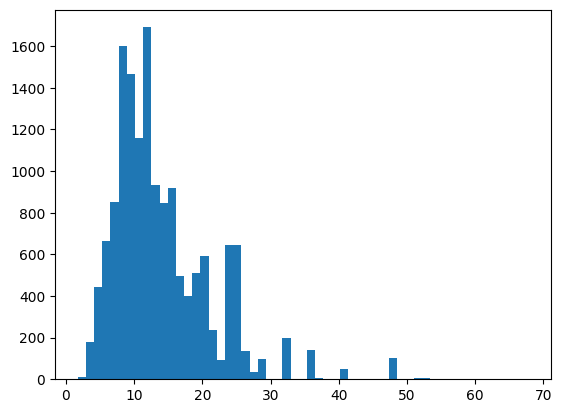

In [134]:
plt.hist(merged_avg['ds_pm_pred'], bins = 55)

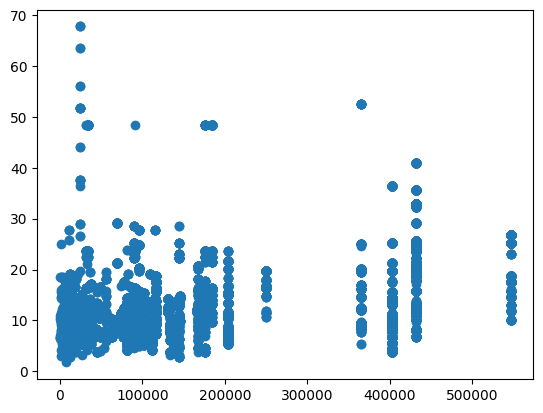

In [135]:
plt.scatter(merged_avg['Shape__Length'], merged_avg['ds_pm_pred'])

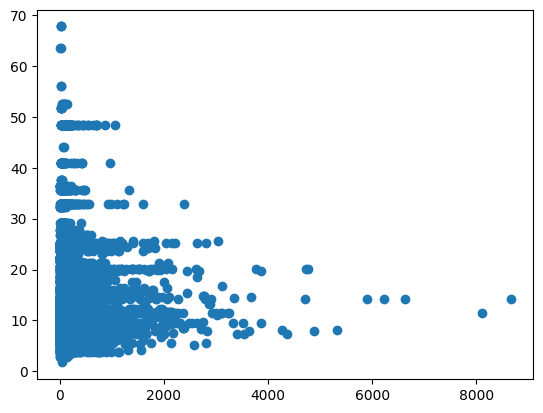

In [136]:
plt.scatter(merged_avg['frp'], merged_avg['ds_pm_pred'])

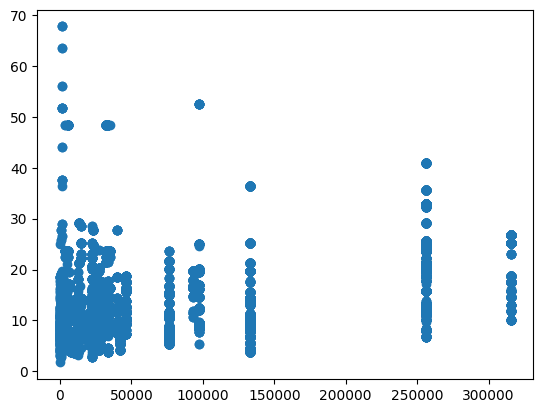

In [139]:
plt.scatter(merged_avg['GIS_ACRES'], merged_avg['ds_pm_pred'])

In [142]:
merged_avg.columns

Index(['index', 'FIRE_NAME', 'GIS_ACRES', 'Shape__Area', 'Shape__Length',
       'acq_date', 'latitude_right', 'longitude_right', 'frp', 'type',
       'bright_t31', 'confidence', 'year', 'month', 'distance', 'day',
       'geometry', 'index_right', 'COUNTY_NAM', 'COUNTY_ABB', 'COUNTY_NUM',
       'COUNTY_COD', 'countyfip', 'ISLAND', 'GlobalID', 'countyfips',
       'ds_pm_pred'],
      dtype='object')

In [143]:
merged_avg['log_acres'] = np.log(merged_avg['GIS_ACRES'] + 1)
merged_avg['log_frp'] = np.log(merged_avg['frp'] + 1)
merged_avg['acres_frp_interaction'] = merged_avg['GIS_ACRES'] * merged_avg['frp']

In [146]:
import statsmodels.api as sm
X = merged_avg[['frp', 'bright_t31', 'Shape__Area', 'Shape__Length']]

X = sm.add_constant(X)
X.reset_index(drop=True, inplace=True)  

y = merged_avg['ds_pm_pred']
y.reset_index(drop=True, inplace=True)  

glm_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.Log()))
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ds_pm_pred   No. Observations:                15167
Model:                            GLM   Df Residuals:                    15162
Model Family:                   Gamma   Df Model:                            4
Link Function:                    Log   Scale:                         0.24713
Method:                          IRLS   Log-Likelihood:                -47965.
Date:                Sun, 05 May 2024   Deviance:                       2959.3
Time:                        16:50:56   Pearson chi2:                 3.75e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1852
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6021      0.117     30.752

In [147]:
X = merged_avg[['acres_frp_interaction', 'log_frp', 'log_acres','day','year', 'month','GIS_ACRES', 'frp', 'bright_t31', 'Shape__Area', 'Shape__Length']]

X = sm.add_constant(X)
X.reset_index(drop=True, inplace=True)  

y = merged_avg['ds_pm_pred']
y.reset_index(drop=True, inplace=True)  

glm_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.Log()))
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ds_pm_pred   No. Observations:                15167
Model:                            GLM   Df Residuals:                    15156
Model Family:                   Gamma   Df Model:                           10
Link Function:                    Log   Scale:                         0.20843
Method:                          IRLS   Log-Likelihood:                -47280.
Date:                Sun, 05 May 2024   Deviance:                       2769.0
Time:                        16:51:01   Pearson chi2:                 3.16e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2614
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -241.88

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = merged_avg[['frp', 'bright_t31', 'Shape__Area', 'Shape__Length']]
y = merged_avg['ds_pm_pred']

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X, y)

y_pred = rf.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 4.93
R-squared: 0.91
